<a href="https://colab.research.google.com/github/maryofcarmo/TCC/blob/main/4%C2%B0_MELHORES_REGIOES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1° Ligar ao google e chamar bibliotecas necessárias

In [1]:
# conecta o notebook ao google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# 2° Ler o arquivo CSV já montado anteriomente, e faz a limpeza

In [4]:
# ler o Arquivo com as informações das estações e coloca na variável est_info
# est_info é um dataframe
est_info = pd.read_csv('/content/drive/MyDrive/TCC/DADOS/INFORMACOES_ESTACOES/est_com_correlacao.csv')

# Excluir as linhas que têm pelo menos um valor vazio
est_info_limp = est_info.dropna()
est_info_limp.head()

,nome do arquivo,Nome,Codigo Estacao,Latitude,Longitude,Altitude,Situacao,Data Inicial,Data Final,Periodicidade da Medicao,P1,P2,P3,K1,K2,K3,S1,S2,S3
0,Nome:_AGUA_BRANCA_Codigo_Estacao:_82989,AGUA BRANCA,82989,-9.264722,-37.938056,603.42,Operante,2000-01-01,2024-06-01,Mensal,0.789641,-0.771172,-0.952617,0.606061,-0.515152,-0.848485,0.804196,-0.713287,-0.937063
2,Nome:_MACEIO_Codigo_Estacao:_82994,MACEIO,82994,-9.551389,-35.770833,84.12,Fechada,2000-01-01,2021-04-07,Mensal,0.668656,-0.659552,-0.492009,0.381691,-0.584615,-0.442761,0.570929,-0.805263,-0.647987
5,Nome:_PALMEIRA_DOS_INDIOS_Codigo_Estacao:_82992,PALMEIRA DOS INDIOS,82992,-9.420278,-36.620278,277.98,Operante,2000-01-01,2024-06-01,Mensal,0.733587,-0.481364,-0.696482,0.484848,-0.212121,-0.606061,0.671329,-0.342657,-0.741259
6,Nome:_PAO_DE_ACUCAR_Codigo_Estacao:_82990,PAO DE ACUCAR,82990,-9.749167,-37.430833,20.86,Operante,2000-01-01,2024-06-01,Mensal,0.630290,-0.705835,-0.940163,0.454545,-0.636364,-0.818182,0.629371,-0.783217,-0.937063
8,Nome:_PORTO_DE_PEDRAS_Codigo_Estacao:_82996,PORTO DE PEDRAS,82996,-9.162012,-35.299881,42.21,Operante,2000-01-01,2024-06-01,Mensal,0.477049,-0.713409,-0.833801,0.181818,-0.515152,-0.545455,0.328671,-0.748252,-0.671329


In [5]:
#numero de estações com dados
len(est_info_limp)

93

# 3° dicionário com 9 df de cada coeficiente de correlação com a localização das 15 melhores usinas

In [6]:
coef = ['P1','K1','S1', 'P2','K2','S2', 'P3','K3','S3']

# Criar dicionário para armazenar os DataFrames com as usinas pertinentes
dataframes = {}

for i in coef:
  # Obter os 5 valores mais próximos de -1 na coluna P3
  top_15_proximos = est_info_limp.iloc[(est_info_limp[i] - (-1)).abs().argsort()[:15]]

  # Ordenar o novo DataFrame de acordo com os valores de P3
  df_ordenado = top_15_proximos.sort_values(by=i).reset_index(drop=True)

  # Adicionar o DataFrame copiado ao dicionário de séries temporais
  dataframes[i] = df_ordenado

In [8]:
dataframes['S2']

,nome do arquivo,Nome,Codigo Estacao,Latitude,Longitude,Altitude,Situacao,Data Inicial,Data Final,Periodicidade da Medicao,P1,P2,P3,K1,K2,K3,S1,S2,S3
0,Nome:_FORTALEZA_Codigo_Estacao:_82397,FORTALEZA,82397,-3.815278,-38.537778,29.89,Operante,2000-01-01,2024-06-01,Mensal,-0.962113,-0.950396,0.968900,-0.878788,-0.939394,0.878788,-0.965035,-0.986014,0.965035
1,Nome:_ARACAJU_Codigo_Estacao:_83096,ARACAJU,83096,-10.952500,-37.054444,3.68,Fechada,2000-01-01,2020-12-31,Mensal,-0.884286,-0.910234,0.948704,-0.818182,-0.878788,0.818182,-0.944056,-0.972028,0.944056
2,Nome:_BARBALHA_Codigo_Estacao:_82784,BARBALHA,82784,-7.300833,-39.271111,409.41,Fechada,2000-01-01,2021-07-31,Mensal,-0.801521,-0.894852,0.728031,-0.727273,-0.878788,0.606061,-0.860140,-0.965035,0.776224
3,Nome:_CRATEUS_Codigo_Estacao:_82583,CRATEUS,82583,-5.190556,-40.673611,299.12,Desativada,2000-01-01,2018-04-29,Mensal,-0.871598,-0.889928,0.900299,-0.757576,-0.818182,0.757576,-0.909091,-0.944056,0.909091
4,Nome:_PETROLINA_Codigo_Estacao:_82983,PETROLINA,82983,-9.388611,-40.523333,372.54,Operante,2000-01-01,2024-06-01,Mensal,-0.472147,-0.917428,0.575151,-0.333333,-0.848485,0.424242,-0.475524,-0.944056,0.629371
5,Nome:_BARRA_DO_CORDA_Codigo_Estacao:_82571,BARRA DO CORDA,82571,-5.506389,-45.237222,154.17,Operante,2000-01-01,2024-06-01,Mensal,-0.917354,-0.909028,0.813172,-0.878788,-0.839719,0.717578,-0.965035,-0.942208,0.858145
6,Nome:_RECIFE_(CURADO)_Codigo_Estacao:_82900,RECIFE (CURADO),82900,-8.059167,-34.959167,11.30,Fechada,2000-01-01,2020-08-31,Mensal,-0.886522,-0.931470,0.744669,-0.787879,-0.848485,0.636364,-0.916084,-0.937063,0.797203
7,Nome:_FLORIANO_Codigo_Estacao:_82678,FLORIANO,82678,-6.761667,-43.003333,126.60,Operante,2000-01-01,2024-06-01,Mensal,-0.951673,-0.912411,0.938733,-0.787879,-0.757576,0.848485,-0.923077,-0.916084,0.951049
8,Nome:_PATOS_Codigo_Estacao:_82791,PATOS,82791,-7.053611,-37.273889,251.65,Operante,2000-01-01,2024-06-01,Mensal,-0.461928,-0.784455,0.799088,-0.424242,-0.727273,0.575758,-0.601399,-0.888112,0.748252
9,Nome:_ITIRUCU_(JAGUAQUARA)_Codigo_Estacao:_83295,ITIRUCU (JAGUAQUARA),83295,-13.527778,-40.119722,757.53,Desativada,2000-01-01,2016-01-30,Mensal,0.031538,-0.743737,-0.415313,0.121212,-0.696970,-0.242424,0.118881,-0.867133,-0.349650


# 4° CONCATENANDO OS DF

## FUNÇÃO PRA CONCATENAR

In [9]:
def concatenar_dataframes(lista_chaves, dataframes):
    """
    Concatena os dataframes correspondentes às chaves na lista e remove duplicatas com base na coluna 'nome do arquivo'.

    Args:
        lista_chaves (list): Lista de chaves a serem concatenadas.
        dataframes (dict): Dicionário com DataFrames onde as chaves são os nomes.

    Returns:
        pd.DataFrame: DataFrame concatenado sem duplicatas.
    """
    # Selecionar os DataFrames com base na lista de chaves
    dfs_selecionados = [dataframes[chave] for chave in lista_chaves]

    # Concatenar os DataFrames
    df_concatenado = pd.concat(dfs_selecionados, ignore_index=True)

    # Remover duplicatas com base na coluna 'nome do arquivo'
    df_sem_duplicatas = df_concatenado.drop_duplicates(subset='nome do arquivo').reset_index(drop=True)

    return df_sem_duplicatas

### DF HIDRO-SOLAR - principais regiões

In [14]:
  # Lista de chaves
hidrio_solar = ['P1', 'K1', 'S1']

# Chamar a função
df_hidro_solar = concatenar_dataframes(hidrio_solar, dataframes)

# Exibir o resultado
df_hidro_solar

,nome do arquivo,Nome,Codigo Estacao,Latitude,Longitude,Altitude,Situacao,Data Inicial,Data Final,Periodicidade da Medicao,P1,P2,P3,K1,K2,K3,S1,S2,S3
0,Nome:_SAO_LUIS_Codigo_Estacao:_82280,SAO LUIS,82280,-2.526667,-44.213611,32.58,Operante,2000-01-01,2024-06-01,Mensal,-0.966953,-0.841134,0.749152,-0.818182,-0.666667,0.545455,-0.937063,-0.832168,0.734266
1,Nome:_FORTALEZA_Codigo_Estacao:_82397,FORTALEZA,82397,-3.815278,-38.537778,29.89,Operante,2000-01-01,2024-06-01,Mensal,-0.962113,-0.950396,0.968900,-0.878788,-0.939394,0.878788,-0.965035,-0.986014,0.965035
2,Nome:_FLORIANO_Codigo_Estacao:_82678,FLORIANO,82678,-6.761667,-43.003333,126.60,Operante,2000-01-01,2024-06-01,Mensal,-0.951673,-0.912411,0.938733,-0.787879,-0.757576,0.848485,-0.923077,-0.916084,0.951049
3,Nome:_CARINHANHA_Codigo_Estacao:_83408,CARINHANHA,83408,-14.297500,-43.771389,455.25,Fechada,2000-01-01,2020-10-31,Mensal,-0.944030,-0.125326,-0.159413,-0.878788,0.060606,-0.121212,-0.958042,0.062937,-0.167832
4,Nome:_PARNAIBA_Codigo_Estacao:_82287,PARNAIBA,82287,-3.086680,-41.783139,52.11,Desativada,2000-01-01,2018-09-30,Mensal,-0.943692,-0.642575,0.595619,-0.757576,-0.515152,0.333333,-0.909091,-0.692308,0.538462
5,Nome:_ALTO_PARNAIBA_Codigo_Estacao:_82970,ALTO PARNAIBA,82970,-9.108333,-45.948611,285.05,Fechada,2000-01-01,2021-07-24,Mensal,-0.932022,0.856360,-0.832606,-0.636364,0.575758,-0.757576,-0.797203,0.776224,-0.867133
6,Nome:_NATAL_Codigo_Estacao:_82598,NATAL,82598,-5.837222,-35.207778,47.68,Operante,2000-01-01,2024-06-01,Mensal,-0.928561,-0.778336,0.797946,-0.878788,-0.606061,0.606061,-0.951049,-0.790210,0.804196
7,Nome:_CAROLINA_Codigo_Estacao:_82765,CAROLINA,82765,-7.337222,-47.459722,182.94,Operante,2000-01-01,2024-06-01,Mensal,-0.928258,-0.831891,0.793031,-0.787879,-0.545455,0.515152,-0.923077,-0.734266,0.699301
8,Nome:_CORRENTINA_Codigo_Estacao:_83286,CORRENTINA,83286,-13.332500,-44.617500,551.69,Operante,2000-01-01,2024-06-01,Mensal,-0.928108,0.439278,-0.258477,-0.787879,0.259550,-0.106873,-0.930070,0.388792,-0.066550
9,Nome:_BARREIRAS_Codigo_Estacao:_83236,BARREIRAS,83236,-12.155833,-45.008333,447.51,Operante,2000-01-01,2024-06-01,Mensal,-0.919957,-0.347890,0.322486,-0.818182,-0.181818,0.121212,-0.923077,-0.265734,0.209790


### DF HIDRO-EOLICA - principais regiões

In [13]:
  # Lista de chaves
hidrio_eolica = ['P2', 'K2', 'S2']

# Chamar a função
df_hidro_eolica = concatenar_dataframes(hidrio_eolica, dataframes)

# Exibir o resultado
df_hidro_eolica

,nome do arquivo,Nome,Codigo Estacao,Latitude,Longitude,Altitude,Situacao,Data Inicial,Data Final,Periodicidade da Medicao,P1,P2,P3,K1,K2,K3,S1,S2,S3
0,Nome:_FORTALEZA_Codigo_Estacao:_82397,FORTALEZA,82397,-3.815278,-38.537778,29.89,Operante,2000-01-01,2024-06-01,Mensal,-0.962113,-0.950396,0.968900,-0.878788,-0.939394,0.878788,-0.965035,-0.986014,0.965035
1,Nome:_RECIFE_(CURADO)_Codigo_Estacao:_82900,RECIFE (CURADO),82900,-8.059167,-34.959167,11.30,Fechada,2000-01-01,2020-08-31,Mensal,-0.886522,-0.931470,0.744669,-0.787879,-0.848485,0.636364,-0.916084,-0.937063,0.797203
2,Nome:_PETROLINA_Codigo_Estacao:_82983,PETROLINA,82983,-9.388611,-40.523333,372.54,Operante,2000-01-01,2024-06-01,Mensal,-0.472147,-0.917428,0.575151,-0.333333,-0.848485,0.424242,-0.475524,-0.944056,0.629371
3,Nome:_FLORIANO_Codigo_Estacao:_82678,FLORIANO,82678,-6.761667,-43.003333,126.60,Operante,2000-01-01,2024-06-01,Mensal,-0.951673,-0.912411,0.938733,-0.787879,-0.757576,0.848485,-0.923077,-0.916084,0.951049
4,Nome:_ARACAJU_Codigo_Estacao:_83096,ARACAJU,83096,-10.952500,-37.054444,3.68,Fechada,2000-01-01,2020-12-31,Mensal,-0.884286,-0.910234,0.948704,-0.818182,-0.878788,0.818182,-0.944056,-0.972028,0.944056
5,Nome:_BARRA_DO_CORDA_Codigo_Estacao:_82571,BARRA DO CORDA,82571,-5.506389,-45.237222,154.17,Operante,2000-01-01,2024-06-01,Mensal,-0.917354,-0.909028,0.813172,-0.878788,-0.839719,0.717578,-0.965035,-0.942208,0.858145
6,Nome:_BARBALHA_Codigo_Estacao:_82784,BARBALHA,82784,-7.300833,-39.271111,409.41,Fechada,2000-01-01,2021-07-31,Mensal,-0.801521,-0.894852,0.728031,-0.727273,-0.878788,0.606061,-0.860140,-0.965035,0.776224
7,Nome:_CRATEUS_Codigo_Estacao:_82583,CRATEUS,82583,-5.190556,-40.673611,299.12,Desativada,2000-01-01,2018-04-29,Mensal,-0.871598,-0.889928,0.900299,-0.757576,-0.818182,0.757576,-0.909091,-0.944056,0.909091
8,Nome:_SENHOR_DO_BONFIM_Codigo_Estacao:_83088,SENHOR DO BONFIM,83088,-10.443072,-40.148244,532.09,Desativada,2000-01-01,2011-07-31,Mensal,0.656221,-0.879052,-0.852624,0.545455,-0.696970,-0.727273,0.678322,-0.853147,-0.860140
9,Nome:_TERESINA_Codigo_Estacao:_82578,TERESINA,82578,-5.034722,-42.801389,75.73,Operante,2000-01-01,2024-06-01,Mensal,-0.916741,-0.854452,0.836257,-0.787879,-0.575758,0.484848,-0.916084,-0.755245,0.727273


### DF SOLAR-EOLICA - principais regiões

In [15]:
  # Lista de chaves
solar_eolica = ['P3', 'K3', 'S3']

# Chamar a função
df_solar_eolica = concatenar_dataframes(solar_eolica, dataframes)

# Exibir o resultado
df_solar_eolica


,nome do arquivo,Nome,Codigo Estacao,Latitude,Longitude,Altitude,Situacao,Data Inicial,Data Final,Periodicidade da Medicao,P1,P2,P3,K1,K2,K3,S1,S2,S3
0,Nome:_JOAO_PESSOA_Codigo_Estacao:_82798,JOAO PESSOA,82798,-7.095278,-34.848611,9.67,Operante,2000-01-01,2024-06-01,Mensal,0.244372,-0.225514,-0.968646,0.121212,-0.060606,-0.878788,0.132867,-0.048951,-0.965035
1,Nome:_AGUA_BRANCA_Codigo_Estacao:_82989,AGUA BRANCA,82989,-9.264722,-37.938056,603.42,Operante,2000-01-01,2024-06-01,Mensal,0.789641,-0.771172,-0.952617,0.606061,-0.515152,-0.848485,0.804196,-0.713287,-0.937063
2,Nome:_GARANHUNS_Codigo_Estacao:_82893,GARANHUNS,82893,-8.910833,-36.493333,827.78,Fechada,2000-01-01,2022-11-11,Mensal,0.800937,-0.811053,-0.947050,0.564902,-0.625972,-0.818182,0.756569,-0.819616,-0.909091
3,Nome:_PAO_DE_ACUCAR_Codigo_Estacao:_82990,PAO DE ACUCAR,82990,-9.749167,-37.430833,20.86,Operante,2000-01-01,2024-06-01,Mensal,0.630290,-0.705835,-0.940163,0.454545,-0.636364,-0.818182,0.629371,-0.783217,-0.937063
4,Nome:_SERRINHA_Codigo_Estacao:_83190,SERRINHA,83190,-11.668056,-39.001944,362.39,Fechada,2000-01-01,2024-06-01,Mensal,0.531922,-0.806141,-0.899631,0.484848,-0.606061,-0.696970,0.608392,-0.783217,-0.867133
5,Nome:_ITABAIANINHA_Codigo_Estacao:_83195,ITABAIANINHA,83195,-11.272222,-37.795000,205.59,Temporariamente Fechada,2000-01-01,2024-06-01,Mensal,0.731130,-0.612028,-0.885413,0.424242,-0.393939,-0.666667,0.615385,-0.587413,-0.825175
6,Nome:_CAMACARI_Codigo_Estacao:_83226,CAMACARI,83226,-12.691233,-38.337536,41.17,Desativada,2000-01-01,2006-07-24,Mensal,0.664823,-0.834846,-0.879398,0.545455,-0.545455,-0.757576,0.699301,-0.727273,-0.916084
7,Nome:_FEIRA_DE_SANTANA_Codigo_Estacao:_83221,FEIRA DE SANTANA,83221,-12.196111,-38.967222,229.52,Fechada,2000-01-01,2018-12-17,Mensal,0.737647,-0.625459,-0.874387,0.666667,-0.393939,-0.606061,0.832168,-0.587413,-0.713287
8,Nome:_PAULO_AFONSO_Codigo_Estacao:_82986,PAULO AFONSO,82986,-9.378106,-38.226771,255.04,Desativada,2000-01-01,2015-04-30,Mensal,0.552183,-0.847032,-0.855743,0.484848,-0.636364,-0.606061,0.629371,-0.790210,-0.804196
9,Nome:_SENHOR_DO_BONFIM_Codigo_Estacao:_83088,SENHOR DO BONFIM,83088,-10.443072,-40.148244,532.09,Desativada,2000-01-01,2011-07-31,Mensal,0.656221,-0.879052,-0.852624,0.545455,-0.696970,-0.727273,0.678322,-0.853147,-0.860140


# 5° plota a localização de cada estação que apresenta a melhor complementaridade

## matplotlib

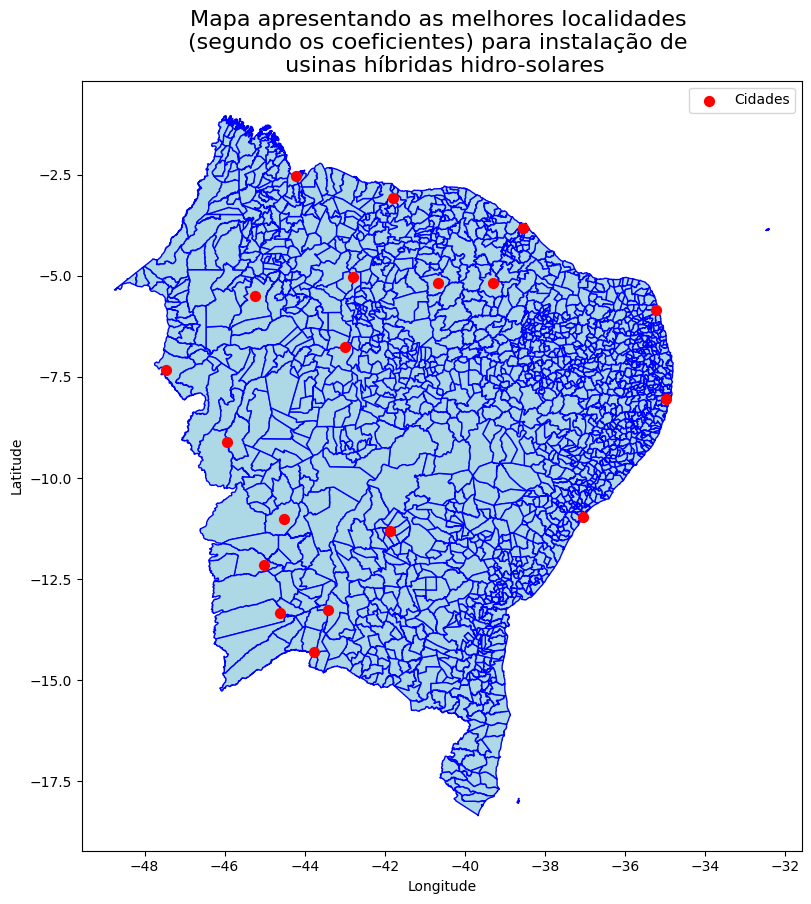

In [47]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point

# Carregar o arquivo GeoJSON
localidade_geojson = "/content/drive/MyDrive/TCC/DADOS/GeoJson/regioes_combinadas.geojson"
localidade = gpd.read_file(localidade_geojson)

# Converter as colunas de latitude e longitude em geometrias (pontos)
geometry = [Point(xy) for xy in zip(df_hidro_solar['Longitude'], df_hidro_solar['Latitude'])]
gdf_estacoes = gpd.GeoDataFrame(df_hidro_solar, geometry=geometry)

# Configurar o sistema de coordenadas geográficas (crs)
gdf_estacoes.set_crs(epsg=4326, inplace=True)  # WGS84

# Plotar o mapa
fig, ax = plt.subplots(figsize=(10, 10))

# Plotar o GeoJSON (base do mapa)
localidade.plot(ax=ax, color='lightblue', edgecolor='blue')

# Plotar os pontos das estações meteorológicas
gdf_estacoes.plot(ax=ax, color='red', markersize=50, label='Cidades')

# Adicionar título e legenda
plt.title('Mapa apresentando as melhores localidades \n(segundo os coeficientes) para instalação de \n usinas híbridas hidro-solares', fontsize=16)
plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Exibir o mapa
plt.show()


In [45]:
# Carregar o GeoJSON da região
geojson_path = "/content/drive/MyDrive/TCC/DADOS/GeoJson/regioes_combinadas.geojson"

# Criar um mapa centrado na média das latitudes e longitudes
centro_lat = df_hidro_solar['Latitude'].mean()
centro_lon = df_hidro_solar['Longitude'].mean()
m = folium.Map(location=[centro_lat, centro_lon], zoom_start=10)

# Adicionar marcadores das estações ao mapa
for _, row in df_hidro_solar.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Estação: {row['Nome']}<br>S3: {row['S3']}",
        tooltip=row['Nome']
    ).add_to(m)

# Exibir o mapa
m.save("mapa_interativo.html")
print("O mapa foi salvo como 'mapa_interativo.html'.")
m

O mapa foi salvo como 'mapa_interativo.html'.
